## WESLEY ALDRICH
## 2702363613
## PPTI 17
## Jawaban ada di bagian paling bawah!

### Exploratory Data Analysis

In [101]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [102]:
import pandas as pd

In [103]:
dataset = pd.read_csv("titanic.csv")

In [104]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
dataset.describe(include="object")

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Dooley, Mr. Patrick",male,347082,G6,S
freq,1,577,7,4,644


In [107]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### JAWABAN

#### task buatlah scatter plot dengan 3 variable

<Axes: xlabel='Age', ylabel='Fare'>

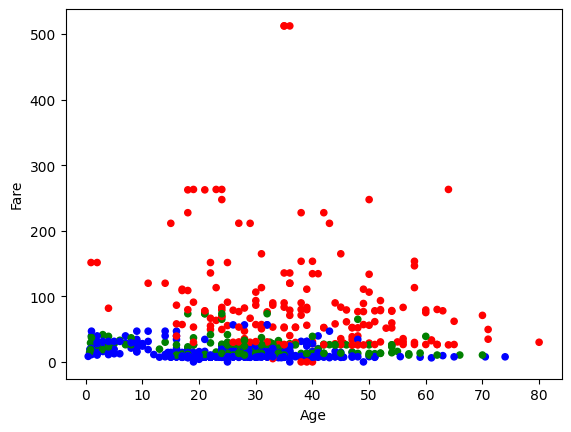

In [108]:
dataset['color_pclass'] = dataset.Pclass.map({
    1: 'red',
    2: 'green',
    3: 'blue'
})

dataset[['Fare', 'Age', 'color_pclass']].plot.scatter(x = 'Age', y = 'Fare', c = 'color_pclass')

#### lakukan EDA dan temukan 5 insight dari hasil visualisasi, lalu tuliskan penjelasan visualisasi di bawah ilustrasinya

##### Insight 1

<Axes: xlabel='Survived'>

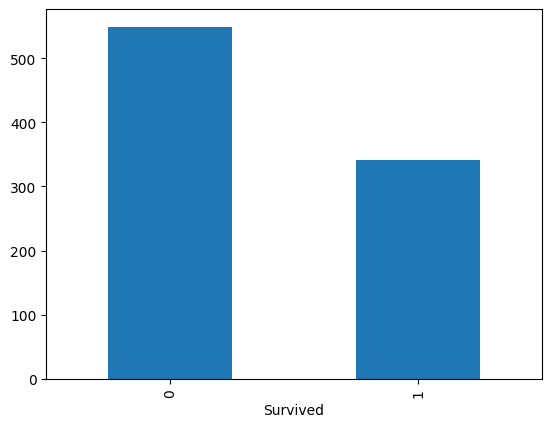

In [109]:
dataset.Survived.groupby(dataset.Survived).count().plot.bar()

- Dari hasil visualisasi di atas, tampak bahwa terdapat lebih banyak penumpang yang tidak selamat daripada yang selamat.

##### Insight 2

<Axes: xlabel='Sex'>

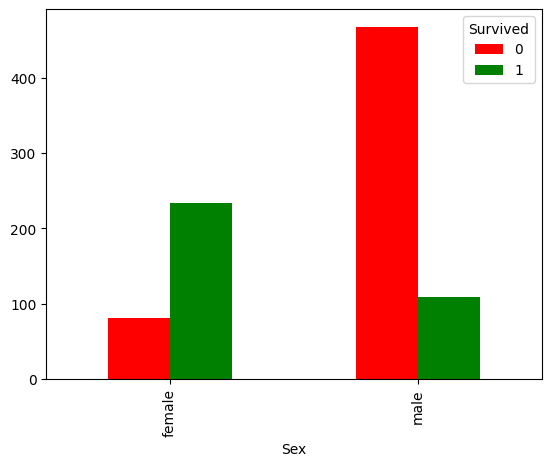

In [110]:
dataset.groupby(['Sex', 'Survived']).size().unstack().plot.bar(
    color=['red', 'green']
)

- Penumpang yang gender-nya perempuan memiliki peluang bertahan hidup yang lebih tinggi daripada laki-laki.
- Hal ini mungkin karena protokol "women and children first" diterapkan pada saat penyelamatan.

##### Insight 3

<Axes: xlabel='Pclass'>

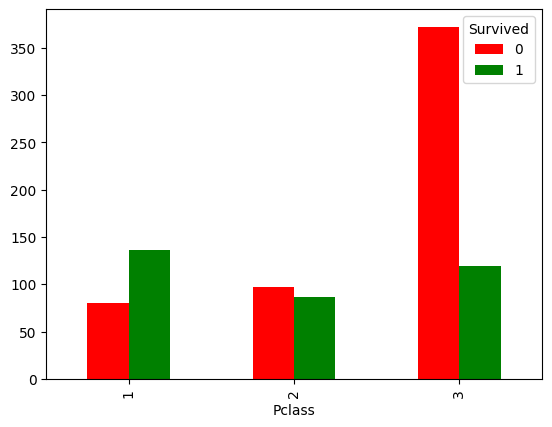

In [111]:
dataset.groupby(['Pclass', 'Survived']).size().unstack().plot.bar(
    color=['red', 'green']
)

- Penumpang kelas pertama memiliki tingkat hidup tertinggi, diikuti kelas kedua, dan terendah pada kelas ketiga.
- Hal ini mungkin dikarenakan faktor sosial ekonomi ternyata berdampak pada prioritas penyelamatan.

##### Insight 4

<Axes: ylabel='Frequency'>

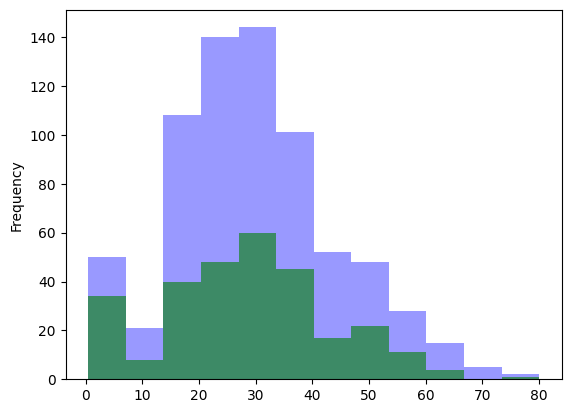

In [112]:
bins_count = 12

dataset['Age'].plot.hist(bins=bins_count, alpha=0.4, label='Survived', color='blue')
dataset[dataset['Survived'] == 1]['Age'].plot.hist(bins=bins_count, alpha=0.6, label='Survived', color='green')

- Dari hasil visualisasi di atas, tampak histogram untuk jumlah penumpang pada setiap rentang umur, serta seberapa banyak yang selamat.
- Penumpang terbanyak berada di rentang umur 20-30, dan jumlah terbanyak yang selamat juga berada pada rentang umur tersebut.

##### Insight 5

In [113]:
dataset.Embarked.fillna('?', inplace=True)

print(dataset['Embarked'].unique())

['S' 'C' 'Q' '?']


C:\Users\Wesley\AppData\Local\Temp\ipykernel_2416\4083176410.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset.Embarked.fillna('?', inplace=True)


diketahui bahwa terdapat 3 tujuan yang berbeda yang terdefinisi, yaitu:
- S (Southampton)
- C (Cherbourg)
- Q (Queenstown)

<Axes: xlabel='Embarked'>

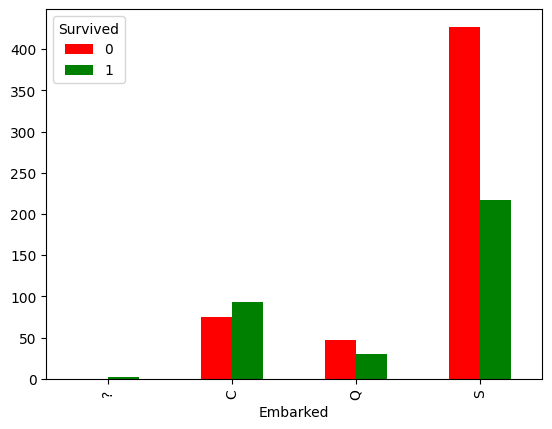

In [114]:
dataset.groupby(['Embarked', 'Survived']).size().unstack().plot.bar(
    color=['red', 'green']
)

- Penumpang yang memiliki tujuan ke S (Southampton) memiliki peluang selamat tertinggi.
- Di saat yang sama, penumpang yang memiliki tujuan ke S (Southampton) juga memiliki peluang tidak selamat tertinggi.